In [2]:

import pandas as pd
df = pd.read_csv('titanic_data.csv')

In [3]:
# What is the total number of people on the titanic and how many of them survived and how many did not?
df.Survived.value_counts()


0.0    549
1.0    342
Name: Survived, dtype: int64

In [4]:
#How many that survived were female and how may that died were female?
print('{} women survived and {} died'.format(len(df.query('Sex == "female" & Survived == 1')),len(df.query('Sex == "female" & Survived == 0'))))


233 women survived and 81 died


In [5]:
#How many children were on the titanic? (Children under 17)
print('{} children were on the titanic'.format(len(df.query('Age < 17'))))


134 children were on the titanic


In [6]:
#How many children died were on the ship?
print('{} children died'.format(len(df.query('Age < 17 & Survived == 0'))))


45 children died


In [11]:
#How many people had families with them?
df['FamilySize'] = df['Siblings - Spouse'] + df['Parents - Children'] + 1
print('{} people were with family'.format(len(df.query('FamilySize != 1'))))

519 people were with family


In [12]:
#What is the ratio of female to male?
print('The ratio men, women is {} %'.format(round(df.Sex.value_counts()[1]/(df.Sex.value_counts()[0]+df.Sex.value_counts()[1])*100,2)))


The ratio men, women is 35.6 %


In [13]:
#What contributed to the survival of those who survived?
df.Sex = pd.get_dummies(df.Sex)


In [14]:
def get_title(name):
    import re
    title_search = re.search(' ([A-Za-z]+)\.', name) 
    if title_search:
        return title_search.group(1)
    return ""

In [15]:
df['Title'] = df['Name'].apply(get_title)


In [16]:
df['Name_length'] = df['Name'].apply(len)


In [17]:
df['Has_Cabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)


In [18]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Siblings - Spouse', 'Parents - Children']
df = df.drop(drop_elements, axis = 1)

In [22]:
df['Port of embarkation'] = pd.get_dummies(df['Port of embarkation'])


In [23]:
df.head()

,Survived,Sex,Age,Ticket class,Fare,Port of embarkation,FamilySize,Title,Name_length,Has_Cabin
0,0.0,0,22.0,3,7.2500,0,2,Mr,23,0
1,1.0,1,38.0,1,71.2833,1,2,Mrs,51,1
2,1.0,1,26.0,3,7.9250,0,1,Miss,22,0
3,1.0,1,35.0,1,53.1000,0,2,Mrs,44,1
4,0.0,0,35.0,3,8.0500,0,1,Mr,24,0


In [24]:
a = df.corr()

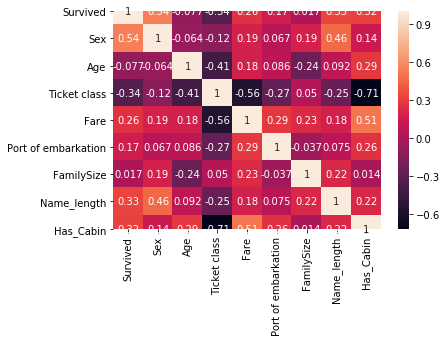

In [26]:
import seaborn as sns
sns.heatmap(a, annot=True)